This notebook will be used to test the script defined in this folder.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imp

## Testing of the potential profile script

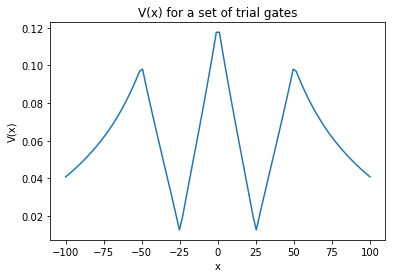

In [6]:
import potential_profile
N_grid = 100
x = np.linspace(-100,100,N_grid,endpoint=True)

# trial potential profile
param1 = [150e-3,-50,50,5,50]
param2 = [-200e-3,-25,50,5,50]
param3 = [250e-3,0,50,5,50]
param4 = [-200e-3,25,50,5,50]
param5 = [150e-3,50,50,5,50]
trial_gates = [param1,param2,param3,param4,param5] 

V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

## Testing of the ThomasFermi class

islands [[18, 48], [51, 81]]
barriers [[5, 17], [49, 50], [82, 94]]
WKB Probability [  8.26003403e-16   7.05104754e-05   8.26003403e-16]
charges [ 36.30078627  36.30078627]
cap_model (array([ 36.30078627,  36.30078627]), array([[ 0.00106709,  0.00022481],
       [ 0.00022481,  0.00106709]]))
stable_config [36 36]
current 1.74504826405e-21
graph charge (36, 36)


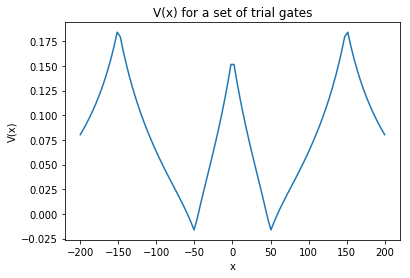

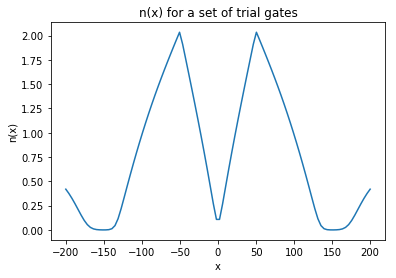

In [13]:
import potential_profile
import thomas_fermi
imp.reload(thomas_fermi)

x = np.linspace(-200,200,100)

# trial potential profile
param1 = [200e-3,-150,50,5,50]
param2 = [-140e-3,-50,50,5,50]
param3 = [250e-3,0,50,5,50]
param4 = [-140e-3,50,50,5,50]
param5 = [200e-3,150,50,5,50]
trial_gates = [param1,param2,param3,param4,param5] 

plt.figure(1)
V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

physics = {'x' : x,
           'V' : V,
           'K_0' : 5e-3, 
           'sigma' : 10.0,
           'mu' : 0.1,
           'D' : 2,
           'g_0' : 1e-1,
           'c_k' : 0e-4,
           'beta' : 100,
           'kT' : 1e-5,
           'WKB_coeff' : 1,
           'barrier_tunnel_rate' : 1.0,
           'bias' : 1e-5,
           'ShortCircuitCurrent' : 1.0,
           'attempt_rate_coef' : 1
           }

tf = thomas_fermi.ThomasFermi(physics)
n = tf.calc_n()
islands = tf.calc_islands()
barriers = tf.calc_barriers()
p_WKB = tf.calc_WKB_prob()
charges = tf.calc_charges()
cap_model = tf.calc_cap_model()
stable_config = tf.calc_stable_config()
current = tf.calc_current()
graph_charge = tf.calc_graph_charge()

print("islands",islands)
print("barriers",barriers)
print("WKB Probability",p_WKB)
print("charges",charges)
print("cap_model",cap_model)
print("stable_config",stable_config)
print("current",current)
print("graph charge",graph_charge)

plt.figure(2)
plt.plot(x,n)
plt.xlabel('x')
plt.ylabel('n(x)')
plt.title("n(x) for a set of trial gates");

## Double dot 2D Map script

In [18]:
import double_dot
imp.reload(double_dot)

double_dot.calc_2D_map()

KeyboardInterrupt: 

In [25]:
## Double dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.load_balanced_view()
lview.block = True

@lview.parallel()
def f(n):
    import double_dot
    double_dot.calc_2D_map()

f.map(range(4))

CompositeError: one or more exceptions from call to method: f
[1:apply]: NameError: name 'datetime' is not defined
[0:apply]: NameError: name 'datetime' is not defined
[3:apply]: NameError: name 'datetime' is not defined
[2:apply]: NameError: name 'datetime' is not defined

# Testing of Random Single Dot script

Physics
 {'kT': 1e-05, 'ShortCircuitCurrent': 0.0, 'g_0': 0.05, 'WKB_coeff': 1, 'K_0': 0.009015304621348742, 'beta': 50, 'D': 2, 'bias': 0.0001, 'barrier_tunnel_rate': 10.0, 'mu_R': -5e-05, 'sigma': 1, 'mu_L': 5e-05, 'c_k': 0.001, 'attempt_rate_coef': 1, 'mu': 0.1, 'V': array([ 0.07628813,  0.07890451,  0.08152719,  0.08415179,  0.08677364,
        0.08938778,  0.09198902,  0.09457189,  0.0971307 ,  0.09965957,
        0.10215243,  0.10460304,  0.10700509,  0.1093522 ,  0.11163797,
        0.11385603,  0.11600014,  0.11806419,  0.12004231,  0.12192893,
        0.12371882,  0.1254072 ,  0.12698977,  0.12846281,  0.1298232 ,
        0.13106852,  0.12986685,  0.1256535 ,  0.12134035,  0.11694048,
        0.11246762,  0.10793609,  0.10336073,  0.09875682,  0.09413999,
        0.08952613,  0.08493128,  0.08037152,  0.07586292,  0.07142134,
        0.0670624 ,  0.06280135,  0.05865294,  0.05463136,  0.05075007,
        0.04702179,  0.04345834,  0.04007059,  0.03686838,  0.03386044,
        0

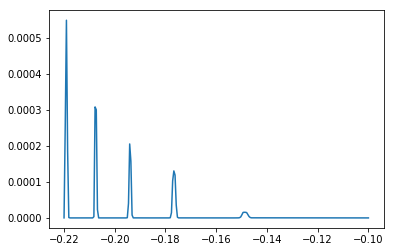

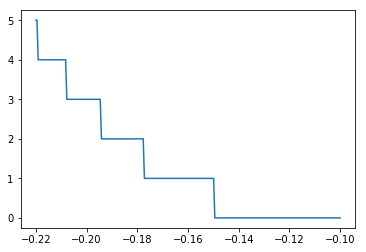

In [13]:
import random_single_dot
imp.reload(random_single_dot)

V_gate,I,charge = random_single_dot.calc_1D_trace(256)
plt.figure(1)
plt.plot(V_gate,I)
plt.figure(2)
plt.plot(V_gate,charge)

In [18]:
## single dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.direct_view()
lview.block = True

@lview.parallel()
def f(n):
    import sys
    sys.path.append('/Users/sandesh/repos/quantum-ml/Nanowire Model')
    import random_single_dot
    random_single_dot.calc_1D_trace(256)

f.map(range(1024))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [27]:
res = np.load("/Users/sandesh/data/single_dot/20171024-022619.npy").item()

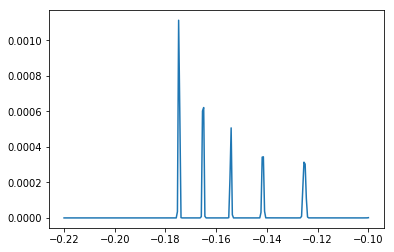

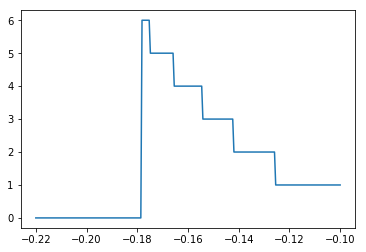

In [35]:
plt.plot(res['V_gate'],res['I'])
plt.figure(2)
plt.plot(res['V_gate'],res['charge'])